# **Introduction**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

**Column Profiling:**

Serial No. (Unique row ID)
GRE Scores (out of 340)
TOEFL Scores (out of 120)
University Rating (out of 5)
Statement of Purpose and Letter of Recommendation Strength (out of 5)
Undergraduate GPA (out of 10)
Research Experience (either 0 or 1)
Chance of Admit (ranging from 0 to 1)


**Problem Statement:** Analyse the predictor variables to draw insights about the importance of various factors in prediction of chances of graduate admission and how they are related to each other.

In [2]:
import math as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom,geom
import math
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import poisson,binom,expon

In [3]:
from scipy.stats import chi2 # Distribution (cdf etc.)
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency # Categorical Vs Categorical
from scipy.stats import ttest_rel,ttest_1samp,ttest_ind
from scipy.stats import binom,t
import scipy.stats as stats

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [6]:
df = pd.read_csv("/content/sample_data/Jamboorie.csv")

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
df.shape

(500, 9)

**Unique Values**

In [11]:
for i in df.columns:
    print(i, '--> ','\n', df[i].unique(), '\n')

Serial No. -->  
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 

# **Exploratory Data Analysis**

In [15]:
df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

Since, 'University Rating', 'SOP', 'LOR', 'Research' are showing categorical nature hence they have been considered as categorical columns

In [16]:
cat_cols = ['University Rating', 'SOP', 'LOR', 'Research']

Rest all columns are considered as numerical columns for EDA

In [17]:
numeric_cols = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

# **Univariate Analysis**

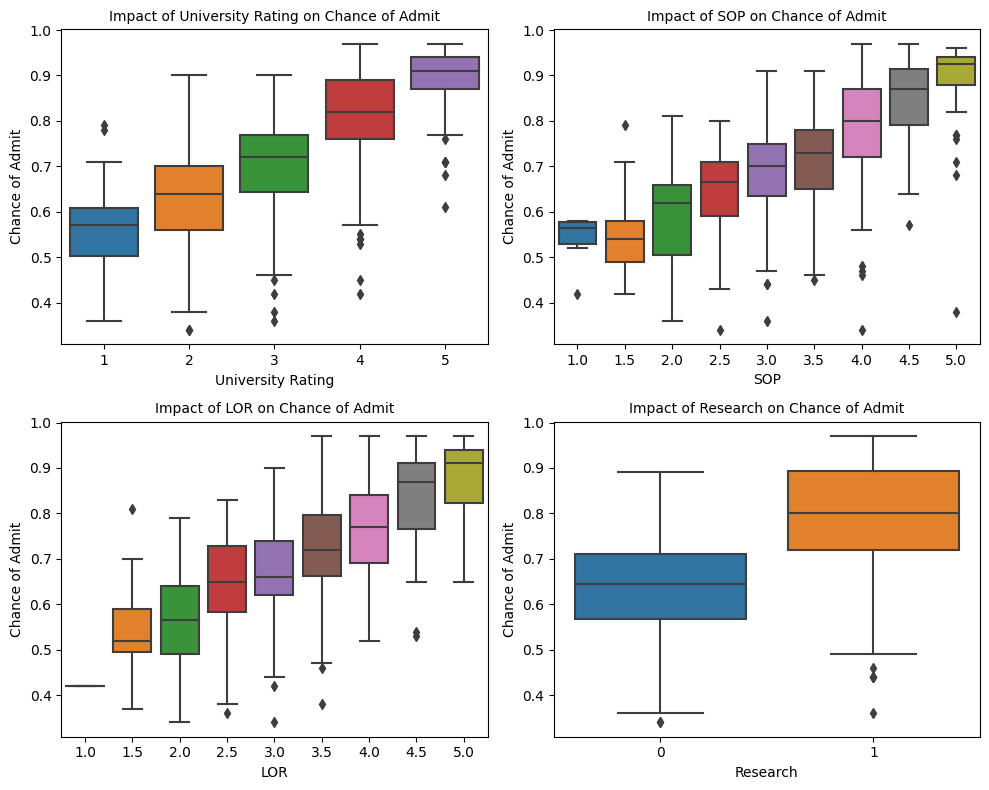

In [18]:
plt.figure(figsize=(10,8))
i=1
for col in cat_cols:
  ax = plt.subplot(2,2,i)
  sns.boxplot(data = df, x=col, y='Chance of Admit')
  plt.title(f"Impact of {col} on Chance of Admit", fontsize=10)
  plt.xlabel(col)
  plt.ylabel('Chance of Admit')
  i+=1

plt.tight_layout()
plt.show()

As seen in the pairplot earlier, the categorical variables such as university ranking, research, quality of SOP and LOR also increase the chances of admit.

**Univariate Analysis**

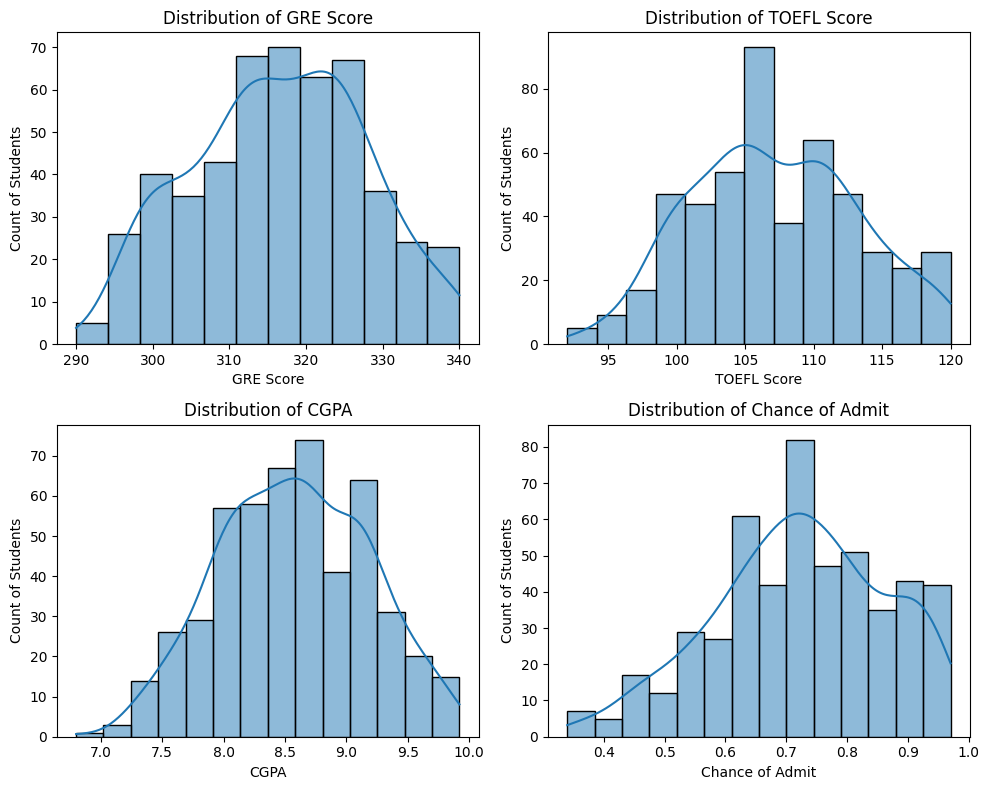

In [22]:
plt.figure(figsize=(10,8))
i=1
for col in numeric_cols:
  ax=plt.subplot(2,2,i)
  sns.histplot(data=df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i += 1

plt.tight_layout()
plt.show();


We can see the range of all the numerical attributes:

GRE scores are between 290 and 340, with maximum students scoring in the range 310-330
TOEFL scores are between 90 and 120, with maximum students scoring around 105
CGPA ranges between 7 and 10, with maximum students scoring around 8.5
Chance of Admit is a probability percentage between 0 and 1, with maximum students scoring around 70%-75%

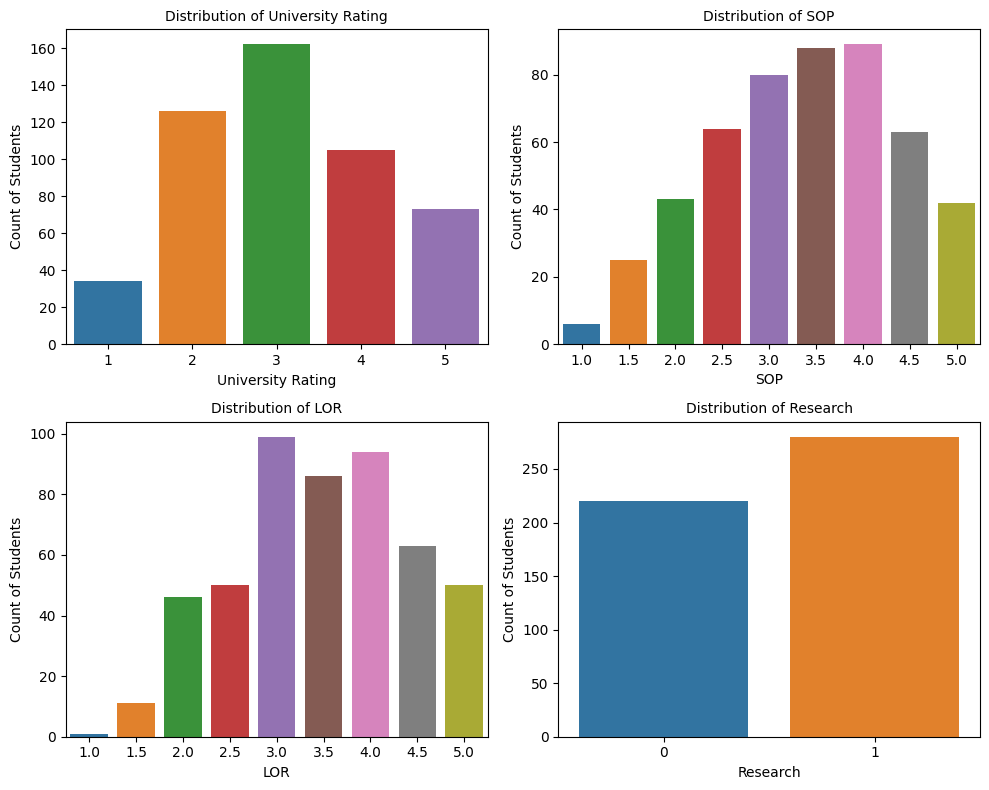

In [23]:
# Distribution of categorical variables
plt.figure(figsize=(10,8))
i=1

for col in cat_cols:
  ax = plt.subplot(2,2,i)
  sns.countplot(x=df[col])
  plt.title(f'Distribution of {col}', fontsize=10)
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i+=1

plt.tight_layout()
plt.show();

It can be observed that the most frequent value of categorical features is as following:

University Rating: 3
SOP: 3.5 & 4
LOR: 3
Research: True

**Bivarient analysis**

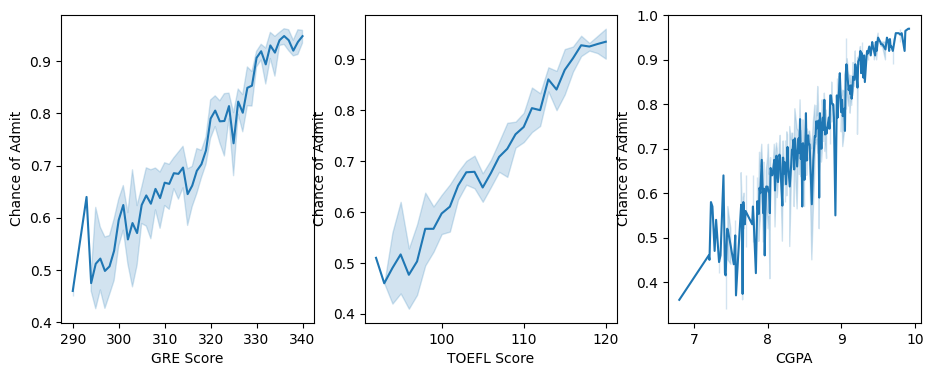

In [24]:
count = 1
plt.figure(figsize=(15,4))
for i in ['GRE Score', 'TOEFL Score','CGPA']:
    plt.subplot(1,4,count)
    sns.lineplot(y =df['Chance of Admit'], x= df[i])
    count += 1

**Creating correlation**

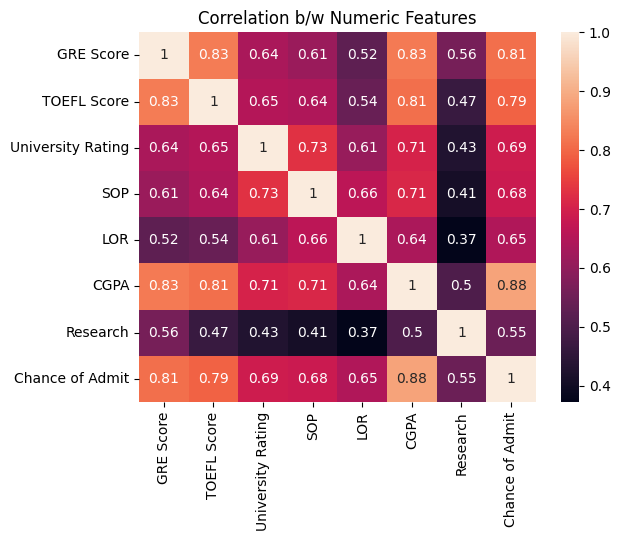

In [25]:
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True)
plt.title('Correlation b/w Numeric Features')
plt.show();

Confirming the inferences from pairplot, the correlation matrix also shows that exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit
Infact, they are also highly correlated amongst themselves

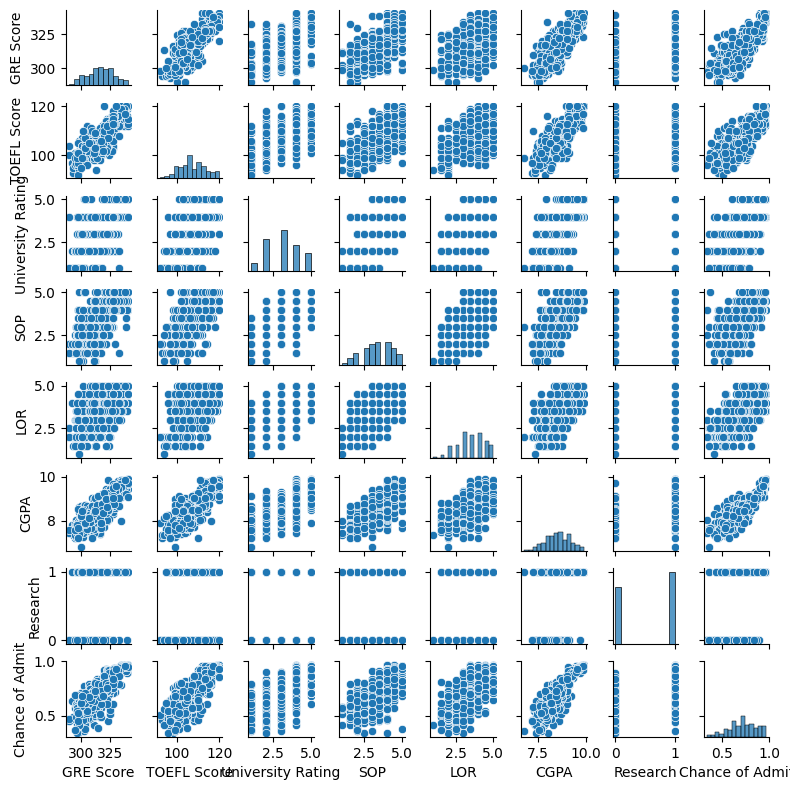

In [26]:
sns.pairplot(df, height= 1)

Exam scores (GRE, TOEFL and CGPA) have a high positive correlation with chance of admit
While university ranking, rating of SOP and LOR also have an impact on chances of admit, research is the only variable which doesn't have much of an impact
We can see from the scatterplot that the values of university ranking, SOP, LOR and research are not continuous. We can convert these columns to categorical variables

# **Data Preprocessing**

**Missing value Check**

In [12]:
#Check for missing values in all columns
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values in the dataset

**Dupliacte Check**

In [13]:
df = df.drop(columns=['Serial No.'])
df = df.drop_duplicates(keep='first')
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


**Unique Values**

In [14]:
for i in df.columns:
    print(i, '--> ','\n', df[i].unique(), '\n')

GRE Score -->  
 [337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293] 

TOEFL Score -->  
 [118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92] 

University Rating -->  
 [4 3 2 5 1] 

SOP -->  
 [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5] 

LOR  -->  
 [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ] 

CGPA -->  
 [9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78 9.18
 9.46 9.38 8.48 8.68 8.34 8.45 8.62 7.46 7.28 8.84 9.56 9.48 8.36 9.32
 8.71 9.35 8.65 9.28 8.77 8.16 9.08 9.12 9.15 9.44 9.92 9.11 8.

# **Outlier Treatment**:

In order to find outliers in various columns we need to create boxplot for outliers

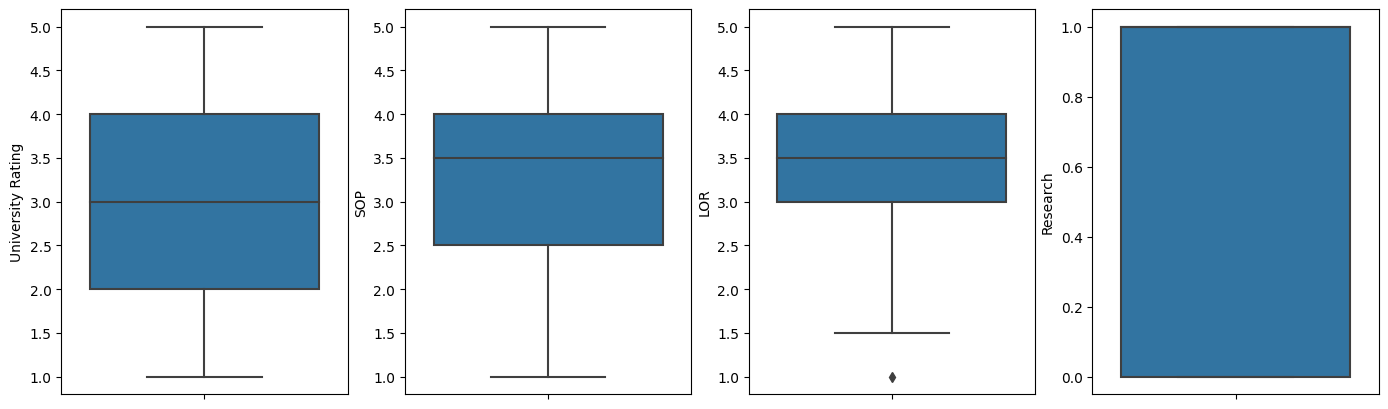

In [19]:
count = 1
plt.figure(figsize=(17,5))
for i in ['University Rating', 'SOP', 'LOR','Research']:
    plt.subplot(1,4,count)
    sns.boxplot(y= df[i])
    count += 1

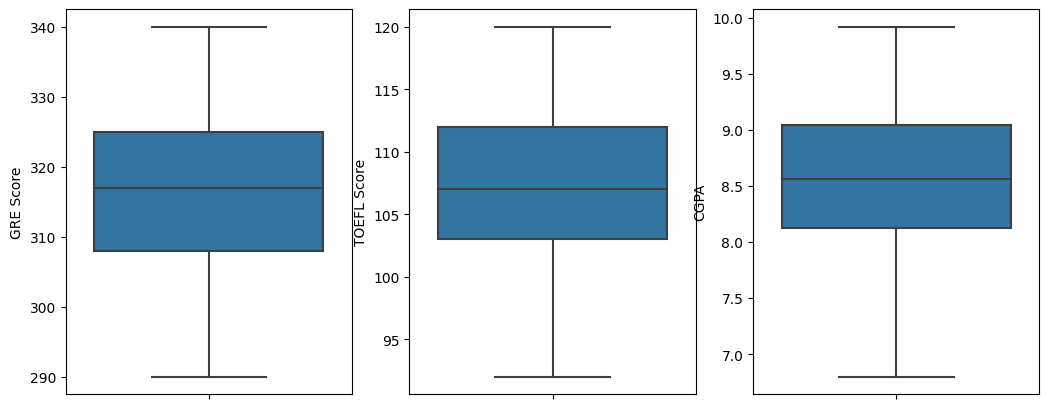

In [20]:
count = 1
plt.figure(figsize=(17,5))
for i in ['GRE Score', 'TOEFL Score','CGPA']:
    plt.subplot(1,4,count)
    sns.boxplot(y = df[i])
    count += 1

Sine, Outliers are very low or not present within the given data, hence no operation is done within the same.

In [27]:
numeric_cols.remove('Chance of Admit')

Separate predictor and target variables

In [28]:
x = df[numeric_cols + cat_cols]
y = df[['Chance of Admit']]

In [29]:
x.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
0,337,118,9.65,4,4.5,4.5,1
1,324,107,8.87,4,4.0,4.5,1
2,316,104,8.00,3,3.0,3.5,1
3,322,110,8.67,3,3.5,2.5,1
4,314,103,8.21,2,2.0,3.0,0


In [30]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [31]:
df1 = df

# **Label Encoding & Standardisation**

In [32]:
le = LabelEncoder()
df1['University Rating'] = le.fit_transform(df1['University Rating'])
df1['SOP'] = le.fit_transform(df1['SOP'])
df1['LOR'] = le.fit_transform(df1['LOR'])
df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,3,7,7,9.65,1,0.92
1,324,107,3,6,7,8.87,1,0.76
2,316,104,2,4,5,8.00,1,0.72
3,322,110,2,5,3,8.67,1,0.80
4,314,103,1,2,4,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,4,7,6,9.02,1,0.87
496,337,117,4,8,8,9.87,1,0.96
497,330,120,4,7,8,9.56,1,0.93
498,312,103,3,6,8,8.43,0,0.73


In [33]:
minmax_trans = MinMaxScaler()
minmax_trans.fit(df1)
scalerd_feature = minmax_trans.transform(df1)
df2 = pd.DataFrame(data=scalerd_feature, columns=['University Rating', 'SOP', 'LOR', 'Research', 'GRE Score',
       'TOEFL Score', 'CGPA', 'Chance of Admit'])
df2

,University Rating,SOP,LOR,Research,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0,0.841270
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0,0.984127
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0,0.936508
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0,0.619048


# **Base Model: Linear Regression**

**Split the data into training and test data**

In order to  train the model, we are splitting the data in to 80-20 ratio. Where, 80% is the training data and 20% is test data
The target variable is Cahnces of admit. Hence, values for it has been captured in Y variable which will be used for predicition.

In [34]:
X = df2[['University Rating', 'SOP', 'LOR', 'Research', 'GRE Score','TOEFL Score', 'CGPA']]
Y = df2['Chance of Admit']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [35]:
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (400, 7)
Shape of x_test: (100, 7)
Shape of y_train: (400,)
Shape of y_test: (100,)


Running the model over Training data to create fit and create the model.

In [36]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.8208741703103732

In [37]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
model.score(x_train, y_train)

0.8215099192361265

Since the values of Train and Test are very close hence there is **no overfitting**

In [38]:
# Evaluating the model using multiple loss functions
def model_evaluation(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else:
    p = len(model.coef_[0])
  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
  RMSE = np.round(mean_squared_error(y_true=y_actual,
                                     y_pred=y_forecast, squared=False),2)
  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
  return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

In [39]:
# Metrics for training data
model_evaluation(y_train.values, y_pred_train, model)

MAE: 0.07
RMSE: 0.09
R2 Score: 0.82
Adjusted R2: 0.82


In [40]:
#Metrics for test data
model_evaluation(y_test.values, y_pred, model)

MAE: 0.06
RMSE: 0.09
R2 Score: 0.82
Adjusted R2: 0.81


Since there is no difference in the loss scores of training and test data, we can conclude that there is no overfitting of the model

Mean Absolute Error of 0.07 shows that on an average, the absolute difference between the actual and predicted values of chance of admit is 7%
Root Mean Square Error of 0.09 means that on an average, the root of squared difference between the actual and predicted values is 9%
R2 Score of 0.82 means that our model captures 82% variance in the data
Adjusted R2 is an extension of R2 which shows how the number of features used changes the accuracy of the prediction

In [41]:
dic = {}
for i, j in zip(model.coef_, ['University Rating', 'SOP', 'LOR', 'Research', 'GRE Score','TOEFL Score', 'CGPA']):
    dic[j] = np.abs(i)

a = sorted(dic.items(), key=lambda kv: (kv[1], kv[0]))
for i in a:
  print(i)

('Research', 0.019079851592410282)
('CGPA', 0.03157107794156394)
('LOR', 0.03891337690960878)
('GRE Score', 0.09159876660812911)
('SOP', 0.1410635193731643)
('University Rating', 0.14541620599466432)
('TOEFL Score', 0.5779641114318913)


From the weight vectors we are able to understand that TOEFEL score has the highest impact on the model.

Alos, we can conclude that CGPA, GRE score,SOP and UNiversity rating have a very goood impact on the Chance of Admit.

# **OLS regression**

We are doing the same analysis using OLS regression results.

Here is we consider alpha or critical value as 5 % to proove Hypothesis.

H0: The column or feature does not have any impact on the prediction
Ha: The column or feature has an impact on the prediction

If P[t] < alpha then we reject the Null hypothesis.

In [42]:
scaler = StandardScaler()
x_tr_scaled = scaler.fit_transform(x_train)

x_sm = sm.add_constant(x_train)
model = sm.OLS(y_train, x_sm)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          2.10e-142
Time:                        07:20:34   Log-Likelihood:                 374.46
No. Observations:                 400   AIC:                            -732.9
Df Residuals:                     392   BIC:                            -701.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0187      0.01

From the above OLS Regression results we can conclude that TOEFL score, GRE score, CGPA have a high impact on Regression model.

# **Testing Assumptions of Linear Regression Model**

**Multicolinearity Check**

VIF (Variance Inflation Factor) is a measure that quantifies the severity of multicollinearity in a regression analysis. It assesses how much the variance of the estimated regression coefficient is inflated due to collinearity.

The formula for VIF is as follows:

VIF(j) = 1 / (1 - R(j)^2)

Where:

j represents the jth predictor variable. R(j)^2 is the coefficient of determination (R-squared) obtained from regressing the jth predictor variable on all the other predictor variables.

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [44]:
df3 = df2[['University Rating', 'LOR', 'Research', 'GRE Score','TOEFL Score', 'CGPA']]
vif0 = pd.DataFrame()
x_t = pd.DataFrame(x_tr_scaled, columns=x_train.columns)
vif0['features'] = x_t.columns
vif0['VIF'] = [vif(x_t.values, i) for i in range(x_t.shape[1])]
vif0['VIF'] = round(vif0['VIF'], 2)
vif0 = vif0.sort_values(by = 'VIF', ascending=False)
vif0

,features,VIF
0,University Rating,4.88
5,TOEFL Score,4.75
1,SOP,4.26
3,Research,2.92
2,LOR,2.80
4,GRE Score,2.08
6,CGPA,1.51


We see that almost all the variables (excluding research) have a very high level of colinearity. This was also observed from the correlation heatmap which showed strong positive correlation between GRE score, TOEFL score and CGPA.

**Homoscedasticity**

Homoscedasticity refers to the assumption in regression analysis that the variance of the residuals (or errors) should be constant across all levels of the independent variables. In simpler terms, it means that the spread of the residuals should be similar across different values of the predictors.

When homoscedasticity is violated, it indicates that the variability of the errors is not consistent across the range of the predictors, which can lead to unreliable and biased regression estimates.

To test for homoscedasticity, there are several graphical and statistical methods that you can use:

Residual plot: Plot the residuals against the predicted values or the independent variables. Look for any systematic patterns or trends in the spread of the residuals. If the spread appears to be consistent across all levels of the predictors, then homoscedasticity is likely met.

Scatterplot: If you have multiple independent variables, you can create scatter plots of the residuals against each independent variable separately. Again, look for any patterns or trends in the spread of the residuals.

Breusch-Pagan Test: This is a statistical test for homoscedasticity. It involves regressing the squared residuals on the independent variables and checking the significance of the resulting model. If the p-value is greater than a chosen significance level (e.g., 0.05), it suggests homoscedasticity. However, this test assumes that the errors follow a normal distribution.

Goldfeld-Quandt Test: This test is used when you suspect heteroscedasticity due to different variances in different parts of the data. It involves splitting the data into two subsets based on a specific criterion and then comparing the variances of the residuals in each subset. If the difference in variances is not significant, it suggests homoscedasticity.

It's important to note that the visual inspection of plots is often the first step to identify potential violations of homoscedasticity. Statistical tests can provide additional evidence, but they may have assumptions or limitations that need to be considered.

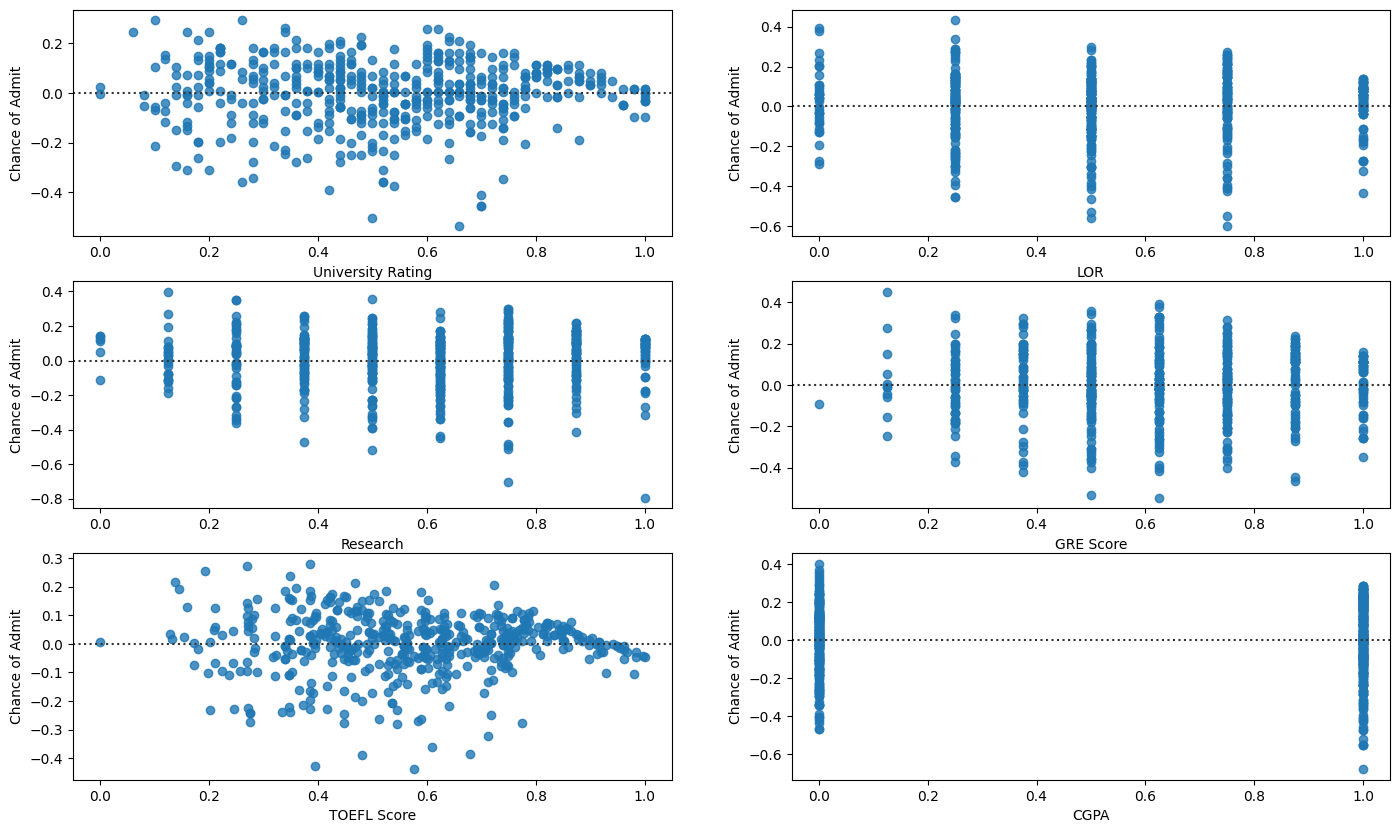

In [45]:
#test for Homoscedasticity with residplot
count = 1
plt.figure(figsize=(17,10))
for i in df3.columns:
  plt.subplot(3,2,count)
  sns.residplot(x = df3[i], y= df2['Chance of Admit'])
  count += 1

Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that homoscedasticity is met.

**Mean of Residuals**

The mean of residuals represents the average of residual values in a regression model. Residuals are the discrepancies or errors between the observed values and the values predicted by the regression model.

The mean of residuals is useful to assess the overall bias in the regression model. If the mean of residuals is close to zero, it indicates that the model is unbiased on average. However, if the mean of residuals is significantly different from zero, it suggests that the model is systematically overestimating or underestimating the observed values.

In [46]:
residuals = y_test.values - y_pred
residuals.reshape((-1,))
print('Mean of Residuals: ', residuals.mean())

Mean of Residuals:  -0.009058079982908373


Since the mean of residuals is very close to 0, we can say that the model is unbiased

**Linearity of Variables**

Linearity of variables refers to the assumption that there is a linear relationship between the independent variables and the dependent variable in a regression model. It means that the effect of the independent variables on the dependent variable is constant across different levels of the independent variables.

When we talk about "no pattern in the residual plot" in the context of linearity, we are referring to the plot of the residuals (the differences between the observed and predicted values of the dependent variable) against the predicted values or the independent variables.

Ideally, in a linear regression model, the residuals should be randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.

If there is a visible pattern in the residual plot, it suggests a violation of the linearity assumption. Common patterns that indicate non-linearity include:

Curved or nonlinear shape: The residuals form a curved or nonlinear pattern instead of a straight line.
U-shaped or inverted U-shaped pattern: The residuals show a U-shape or inverted U-shape, indicating a nonlinear relationship.
Funnel-shaped pattern: The spread of residuals widens or narrows as the predicted values or independent variables change, suggesting heteroscedasticity.
Clustering or uneven spread: The residuals show clustering or uneven spread across different levels of the predicted values or independent variables.
If a pattern is observed in the residual plot, it may indicate that the linear regression model is not appropriate, and nonlinear regression or other modeling techniques should be considered. Additionally, transformations of variables, adding interaction terms, or using polynomial terms can sometimes help capture nonlinear relationships and improve linearity in the residual plot.

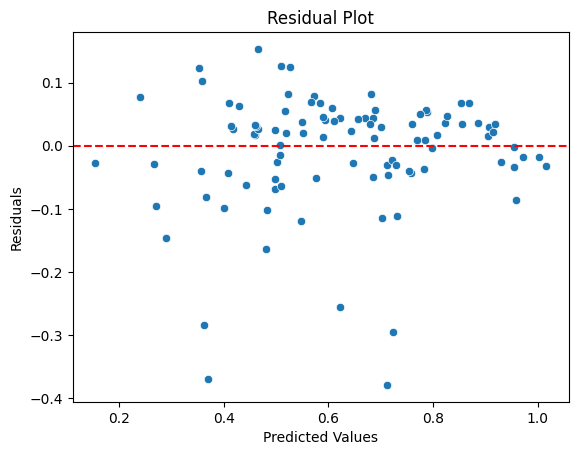

In [47]:
sns.scatterplot(x = y_pred.reshape((-1,)), y=residuals.reshape((-1,)))
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

Since the residual plot shows no clear pattern or trend in residuals, we can conclude that linearity of variables exists

**Normality of Residuals**

Normality of residuals refers to the assumption that the residuals (or errors) in a statistical model are normally distributed. Residuals are the differences between the observed values and the predicted values from the model.

The assumption of normality is important in many statistical analyses because it allows for the application of certain statistical tests and the validity of confidence intervals and hypothesis tests. When residuals are normally distributed, it implies that the errors are random, unbiased, and have consistent variability.

To check for the normality of residuals, you can follow these steps:

Residual Histogram: Create a histogram of the residuals and visually inspect whether the shape of the histogram resembles a bell-shaped curve. If the majority of the residuals are clustered around the mean with a symmetric distribution, it suggests normality.

Q-Q Plot (Quantile-Quantile Plot): This plot compares the quantiles of the residuals against the quantiles of a theoretical normal distribution. If the points in the Q-Q plot are reasonably close to the diagonal line, it indicates that the residuals are normally distributed. Deviations from the line may suggest departures from normality.

Shapiro-Wilk Test: This is a statistical test that checks the null hypothesis that the residuals are normally distributed. The Shapiro-Wilk test calculates a test statistic and provides a p-value. If the p-value is greater than the chosen significance level (e.g., 0.05), it suggests that the residuals follow a normal distribution. However, this test may not be reliable for large sample sizes.

Skewness and Kurtosis: Calculate the skewness and kurtosis of the residuals. Skewness measures the asymmetry of the distribution, and a value close to zero suggests normality. Kurtosis measures the heaviness of the tails of the distribution compared to a normal distribution, and a value close to zero suggests similar tail behavior.

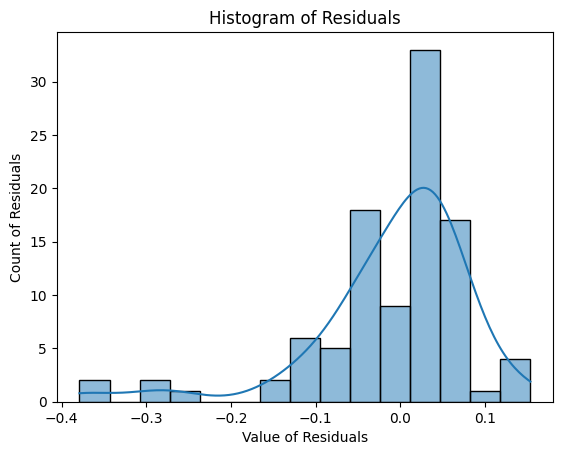

In [48]:
#Histogram of Residuals
sns.histplot(residuals.reshape((-1,)), kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Value of Residuals')
plt.ylabel('Count of Residuals')
plt.show();

The histogram shows that there is a negative skew in the distribution of residuals but it is close to a normal distribution



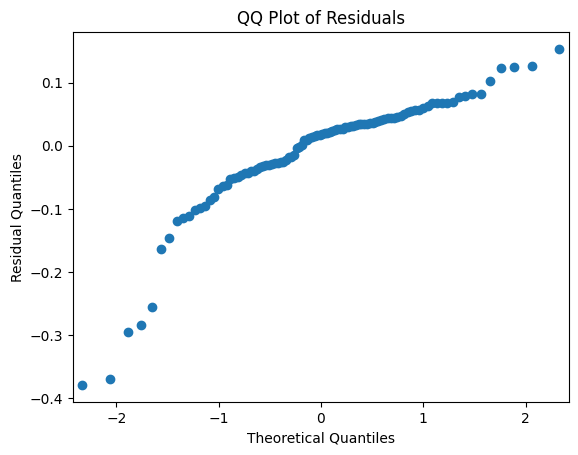

In [49]:
# QQ-Plot of residuals
sm.qqplot(residuals.reshape((-1,)))
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
plt.show();

The QQ plot shows that residuals are slightly deviating from the straight diagonal.

# ***Lasso and Ridge Regression***

Ridge and Lasso regression are both regularization techniques used to prevent overfitting in linear regression models. They work by adding a penalty term to the cost function, which helps to control the complexity of the model by shrinking the coefficient values.

Ridge Regression: Ridge regression uses L2 regularization, where the penalty term is the squared sum of the coefficients multiplied by a regularization parameter (lambda or alpha). The regularization term helps to reduce the impact of less important features on the model and prevents them from dominating the model. Ridge regression can help in reducing the variance of the model and is particularly useful when dealing with multicollinearity (high correlation between independent variables).

Lasso Regression: Lasso regression uses L1 regularization, where the penalty term is the sum of the absolute values of the coefficients multiplied by a regularization parameter (lambda or alpha). Lasso regression has the ability to shrink some coefficients to exactly zero, effectively performing feature selection. This makes Lasso regression useful when dealing with high-dimensional data where only a few variables are relevant.

The main differences between Ridge and Lasso regression are:

Ridge regression tends to shrink all coefficient values towards zero, but it rarely makes them exactly zero. On the other hand, Lasso regression can make coefficient values exactly zero, performing variable selection.
Ridge regression is suitable when dealing with multicollinearity, as it will shrink correlated variables together. Lasso regression, however, can select one variable from a set of highly correlated variables and make the others zero.

In [50]:
# Initialising instance of Ridge and Lasso classes
model_ridge = Ridge()
model_lasso = Lasso()

In [51]:
# Fitting the models to training data
model_ridge.fit(x_train, y_train)
model_lasso.fit(x_train, y_train)

Lasso()

In [52]:
# Predicting values for train and test data

y_train_ridge = model_ridge.predict(x_train)
y_test_ridge = model_ridge.predict(x_test)

y_train_lasso = model_lasso.predict(x_train)
y_test_lasso = model_lasso.predict(x_test)

In [53]:
# Evaluating Model Performance
print('Ridge Regression Training Accuracy\n')
model_evaluation(y_train.values, y_train_ridge, model_ridge)
print('\n\nRidge Regression Test Accuracy\n')
model_evaluation(y_test.values, y_test_ridge, model_ridge)
print('\n\nLasso Regression Training Accuracy\n')
model_evaluation(y_train.values, y_train_lasso, model_lasso)
print('\n\nLasso Regression Test Accuracy\n')
model_evaluation(y_test.values, y_test_lasso, model_lasso)

Ridge Regression Training Accuracy

MAE: 0.07
RMSE: 0.1
R2 Score: 0.82
Adjusted R2: 0.82


Ridge Regression Test Accuracy

MAE: 0.06
RMSE: 0.09
R2 Score: 0.82
Adjusted R2: 0.81


Lasso Regression Training Accuracy

MAE: 0.18
RMSE: 0.22
R2 Score: 0.0
Adjusted R2: -0.02


Lasso Regression Test Accuracy

MAE: 0.18
RMSE: 0.22
R2 Score: -0.0
Adjusted R2: -0.08


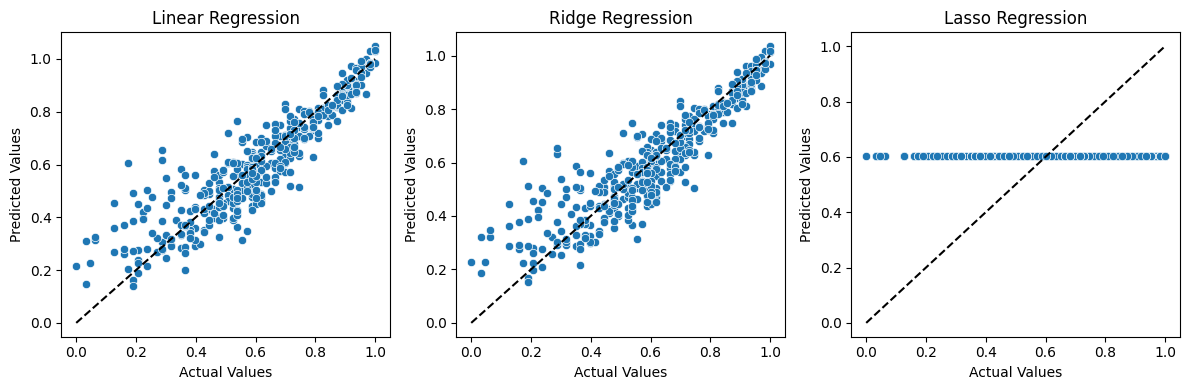

In [54]:
# Actual v/s Predicted values for training data

actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_train_ridge.reshape((-1,)), y_train_lasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

plt.figure(figsize=(12,4))
i=1
for preds in predicted_values:
  ax = plt.subplot(1,3,i)
  sns.scatterplot(x=actual_values, y=preds)
  plt.plot([min(actual_values),max(actual_values)], [min(actual_values),max(actual_values)], 'k--')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(model[i-1])
  i+=1

plt.tight_layout()
plt.show();

We can observe that both Linear Regression and Ridge Regression have similar accuracy while Lasso regression has oversimplified the model.

This is the reason that the r2 score of Lasso regression is 0. It doesn't capture any variance in the target variable. It has predicted the same value across all instances.

# **Insights & Recommendations**

**Insights:**

- The distribution of target variable (chances of admit) is left-skewed

- Exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit.

- These variables are also highly correlated amongst themselves
the categorical variables such as university ranking, research, quality of SOP and LOR also show an upward trend for chances of admit.

- From the model coefficients (weights), we can conclude that CGPA is the most significant predictor variable while SOP/University Rating are the least significant

- Both Linear Regression and Ridge Regression models, which are our best models, have captured upto 82% of the variance in the target variable (chance of admit).

- Due to high colinearity among the predictor variables, it is difficult to achieve better results.

- Other than multicolinearity, the predictor variables have met the conditions required for Linear Regression - mean of residuals is close to 0, linearity of variables, normality of residuals and homoscedasticity is established.


**Recommendations:**

Since all the exam scores are highly correlated, it is recommended to add more independent features for better prediction.

Examples of other independent variables could be work experience, internships, mock interview performance, extracurricular activities or diversity variables